In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [113]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


About the dataset-

we are needed to predict the happiness score

In [114]:
df.shape

(158, 12)

Dataset contains 158 rows and 12 columns

In [115]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Country and region column has object data set which we need to encode.

In [116]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

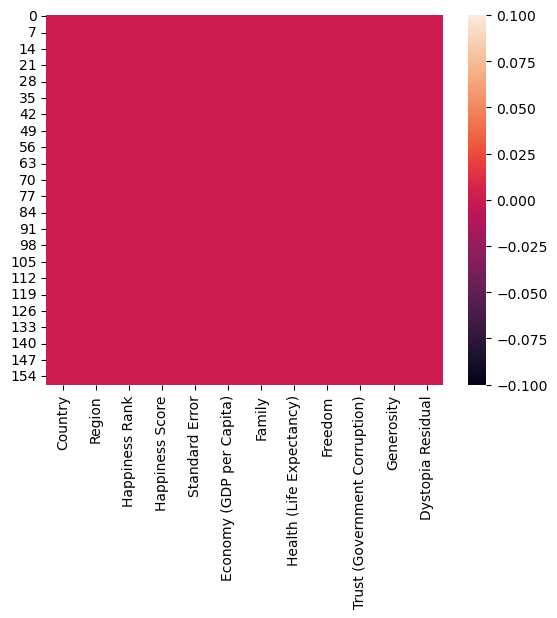

In [117]:
sns.heatmap(df.isnull())

it is very much clear from the dataset that our dataset doesnt contains any null values

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

it is clear from this information that our dataset has float,integer,object data types. having 158 rows of data and 12 columns.

In [119]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [120]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [121]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

Observations-

1. Here it can be clearly seen that we have to encode country and region column because in these columns there are object data.
2. Country column has 158 unique entries and region column has 10 unique entries.

In [122]:
print('Total duplicate rows are:-', df.duplicated().sum())

Total duplicate rows are:- 0


so there is no duplicate values in the dataset.

In [123]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [124]:
#Encoding-

In [125]:
from sklearn.preprocessing import OrdinalEncoder

In [126]:
x=OrdinalEncoder(categories=[['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesia', 'Vietnam', 'Turkey', 'Kyrgyzstan',
       'Nigeria', 'Bhutan', 'Azerbaijan', 'Pakistan', 'Jordan',
       'Montenegro', 'China', 'Zambia', 'Romania', 'Serbia', 'Portugal',
       'Latvia', 'Philippines', 'Somaliland region', 'Morocco',
       'Macedonia', 'Mozambique', 'Albania', 'Bosnia and Herzegovina',
       'Lesotho', 'Dominican Republic', 'Laos', 'Mongolia', 'Swaziland',
       'Greece', 'Lebanon', 'Hungary', 'Honduras', 'Tajikistan',
       'Tunisia', 'Palestinian Territories', 'Bangladesh', 'Iran',
       'Ukraine', 'Iraq', 'South Africa', 'Ghana', 'Zimbabwe', 'Liberia',
       'India', 'Sudan', 'Haiti', 'Congo (Kinshasa)', 'Nepal', 'Ethiopia',
       'Sierra Leone', 'Mauritania', 'Kenya', 'Djibouti', 'Armenia',
       'Botswana', 'Myanmar', 'Georgia', 'Malawi', 'Sri Lanka',
       'Cameroon', 'Bulgaria', 'Egypt', 'Yemen', 'Angola', 'Mali',
       'Congo (Brazzaville)', 'Comoros', 'Uganda', 'Senegal', 'Gabon',
       'Niger', 'Cambodia', 'Tanzania', 'Madagascar',
       'Central African Republic', 'Chad', 'Guinea', 'Ivory Coast',
       'Burkina Faso', 'Afghanistan', 'Rwanda', 'Benin', 'Syria',
       'Burundi', 'Togo'],['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia']])

In [127]:
y=x.fit_transform(df[['Country','Region']])

In [128]:
z=pd.DataFrame(y)
z

,0,1
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,1.0
...,...,...
153,153.0,8.0
154,154.0,8.0
155,155.0,3.0
156,156.0,8.0


In [129]:
df[['country','region']]=z

In [130]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,region
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.0,0.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.0,0.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.0,0.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3.0,0.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,153.0,8.0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,154.0,8.0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,155.0,3.0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,156.0,8.0


In [297]:
#Dropping old columns-

In [131]:
df=df.drop(columns=['Country','Region'])
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,region
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.0,0.0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.0,0.0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.0,0.0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3.0,0.0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,153.0,8.0
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,154.0,8.0
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,155.0,3.0
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,156.0,8.0


In [132]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
country                          float64
region                           float64
dtype: object

Now all the data has been converted into int or float data.

In [133]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,region
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,78.500000,5.050633
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,45.754781,2.766491
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.000000,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,39.250000,3.000000
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,78.500000,6.000000
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,117.750000,8.000000
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,157.000000,9.000000


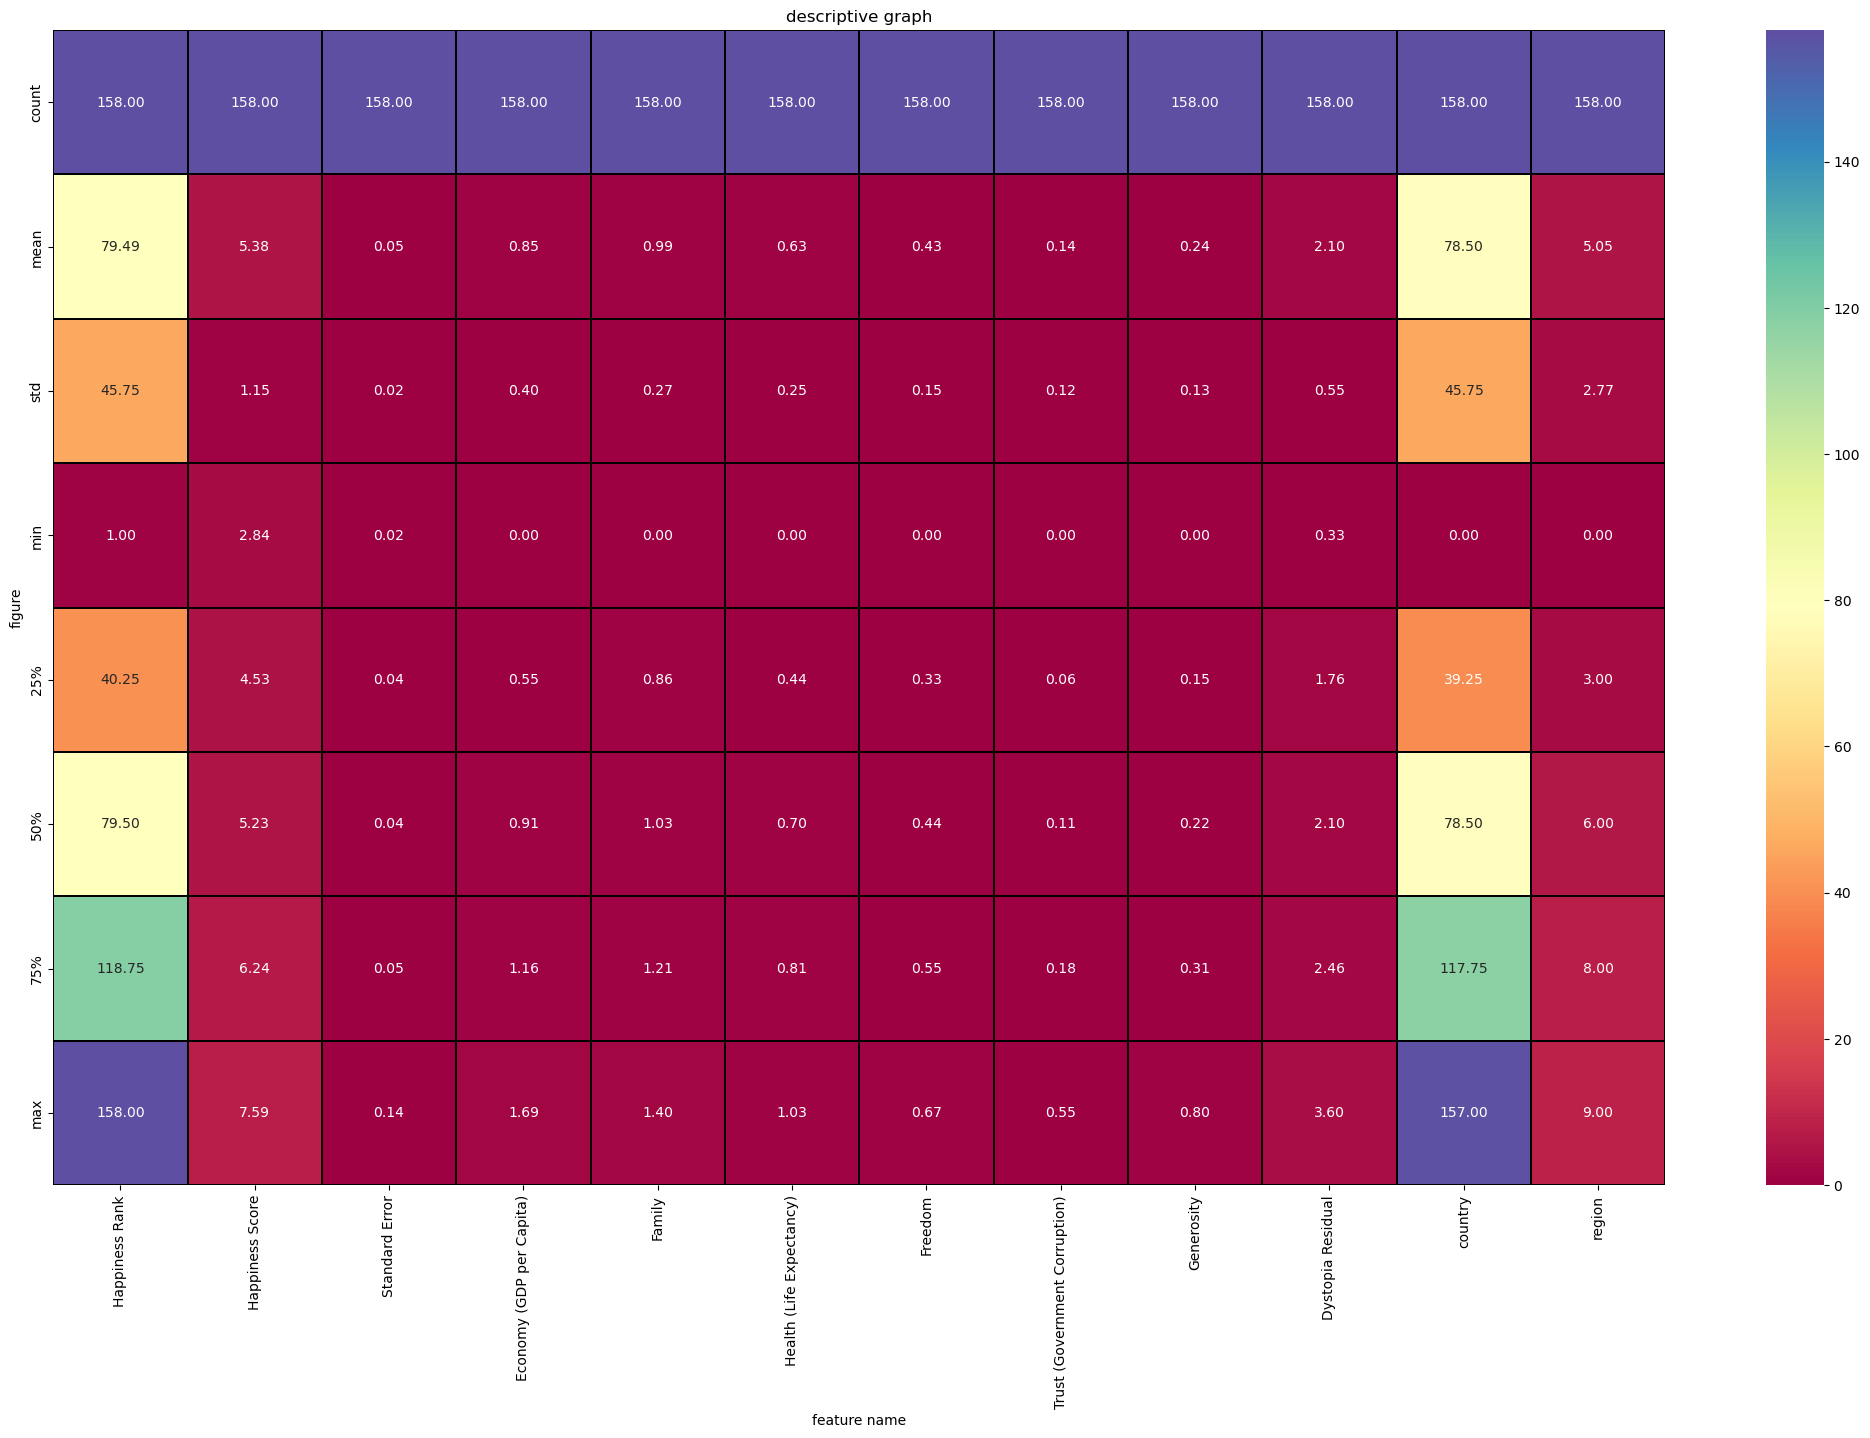

In [134]:
plt.figure(figsize=(26,15))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('feature name')
plt.ylabel('figure')  
plt.title('descriptive graph')  
plt.show() 

Observations-

1. The count of the all values are same so there are no null values present in the dataset.
2. in economy,family,health, column median is greater than the mean so data is left skewed in this column.
3. in trust & generocity column mean is greater than median so data will be right skewed in these columns.
4. there is a huge gap bw 75% and maximum in standard error,trust,generosity,dystopia residual column so there may be outliers present in these columns

In [136]:
#Univariate analysis-

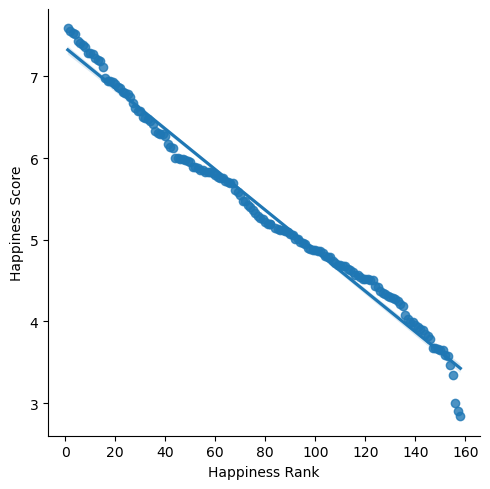

In [137]:
sns.lmplot(x='Happiness Rank',y='Happiness Score',data=df,palette='colorblind')

it looks like very close relationship bw happiness rank & happiness score as the data is very far from the predicted line.

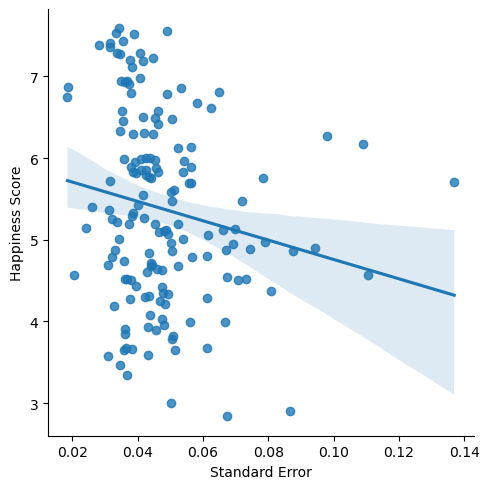

In [138]:
sns.lmplot(x='Standard Error',y='Happiness Score',data=df,palette='colorblind')

it looks like not much or not so close relationship bw standard error & happiness score column  as the data is very far from the predicted line.

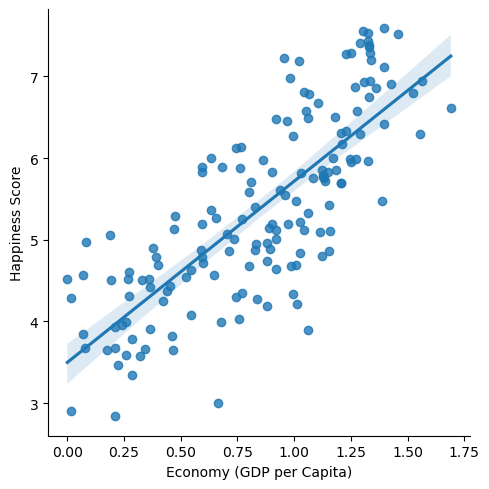

In [139]:
sns.lmplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,palette='colorblind')

it looks like some relationship but not so very close relationship bw Economy & Happiness score as the data is very far from the predicted line.

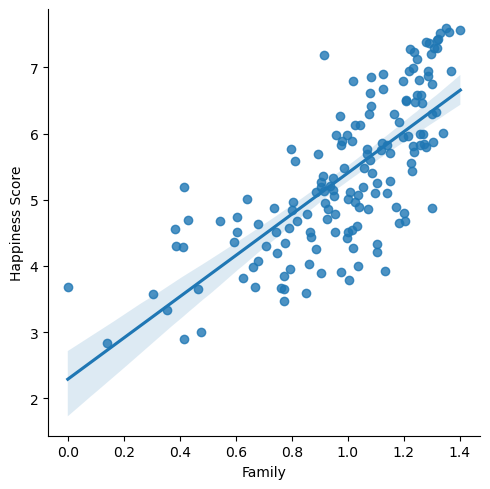

In [140]:
sns.lmplot(x='Family',y='Happiness Score',data=df,palette='colorblind')

it looks like some relationship but not so very close relationship bw family & Happiness score  as the data is very far from the predicted line.

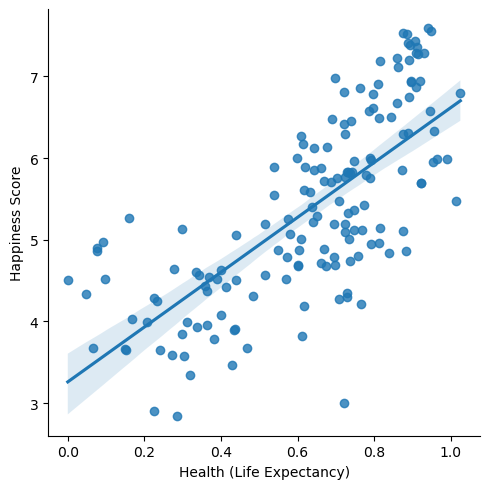

In [141]:
sns.lmplot(x='Health (Life Expectancy)',y='Happiness Score',data=df,palette='colorblind')

it looks like some relationship but not so very close relationship bw health & Happiness score as the data is very far from the 
predicted line.

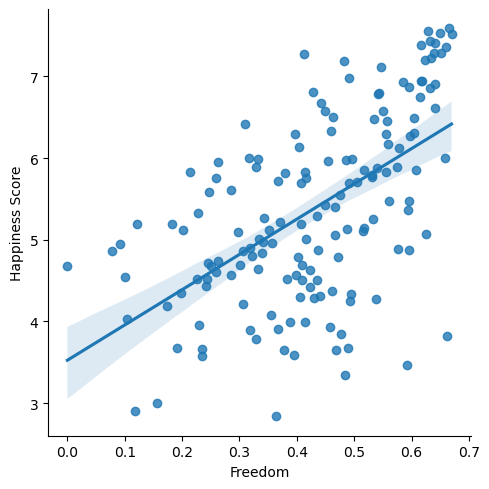

In [142]:
sns.lmplot(x='Freedom',y='Happiness Score',data=df,palette='colorblind')

it looks like some relationship but not so very close relationship bw freedom & Happiness score as the data is very far from the predicted line.

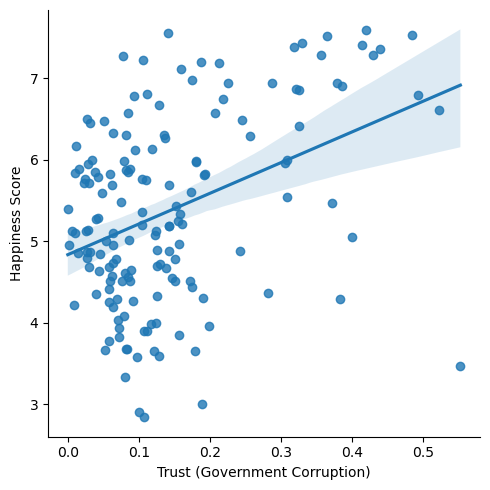

In [143]:
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',data=df,palette='colorblind')

very less relationship bw happiness score & trust as the data is very far from the predicted line.

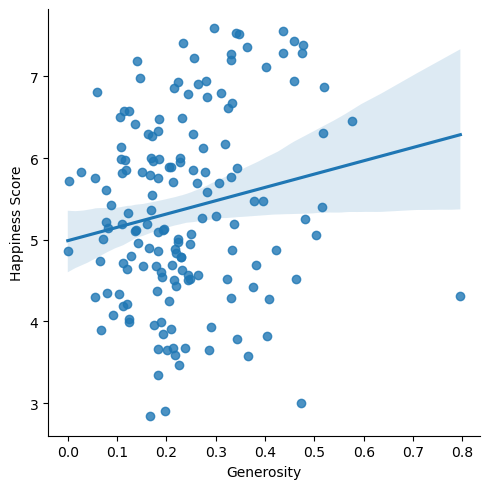

In [144]:
sns.lmplot(x='Generosity',y='Happiness Score',data=df,palette='colorblind')

very less relationship bw happiness score & generosity as the data is very far from the predicted line.

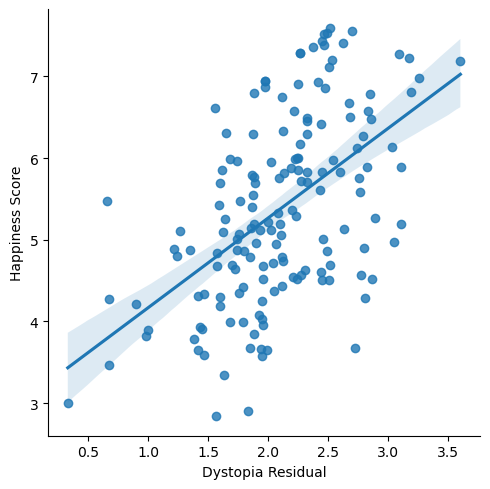

In [145]:
sns.lmplot(x='Dystopia Residual',y='Happiness Score',data=df,palette='colorblind')

relationship bw happiness score & Dystopia Residual is not very close as the data is very far from the predicted line.

In [146]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,region
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.0,0.0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.0,0.0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.0,0.0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3.0,0.0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,153.0,8.0
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,154.0,8.0
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,155.0,3.0
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,156.0,8.0


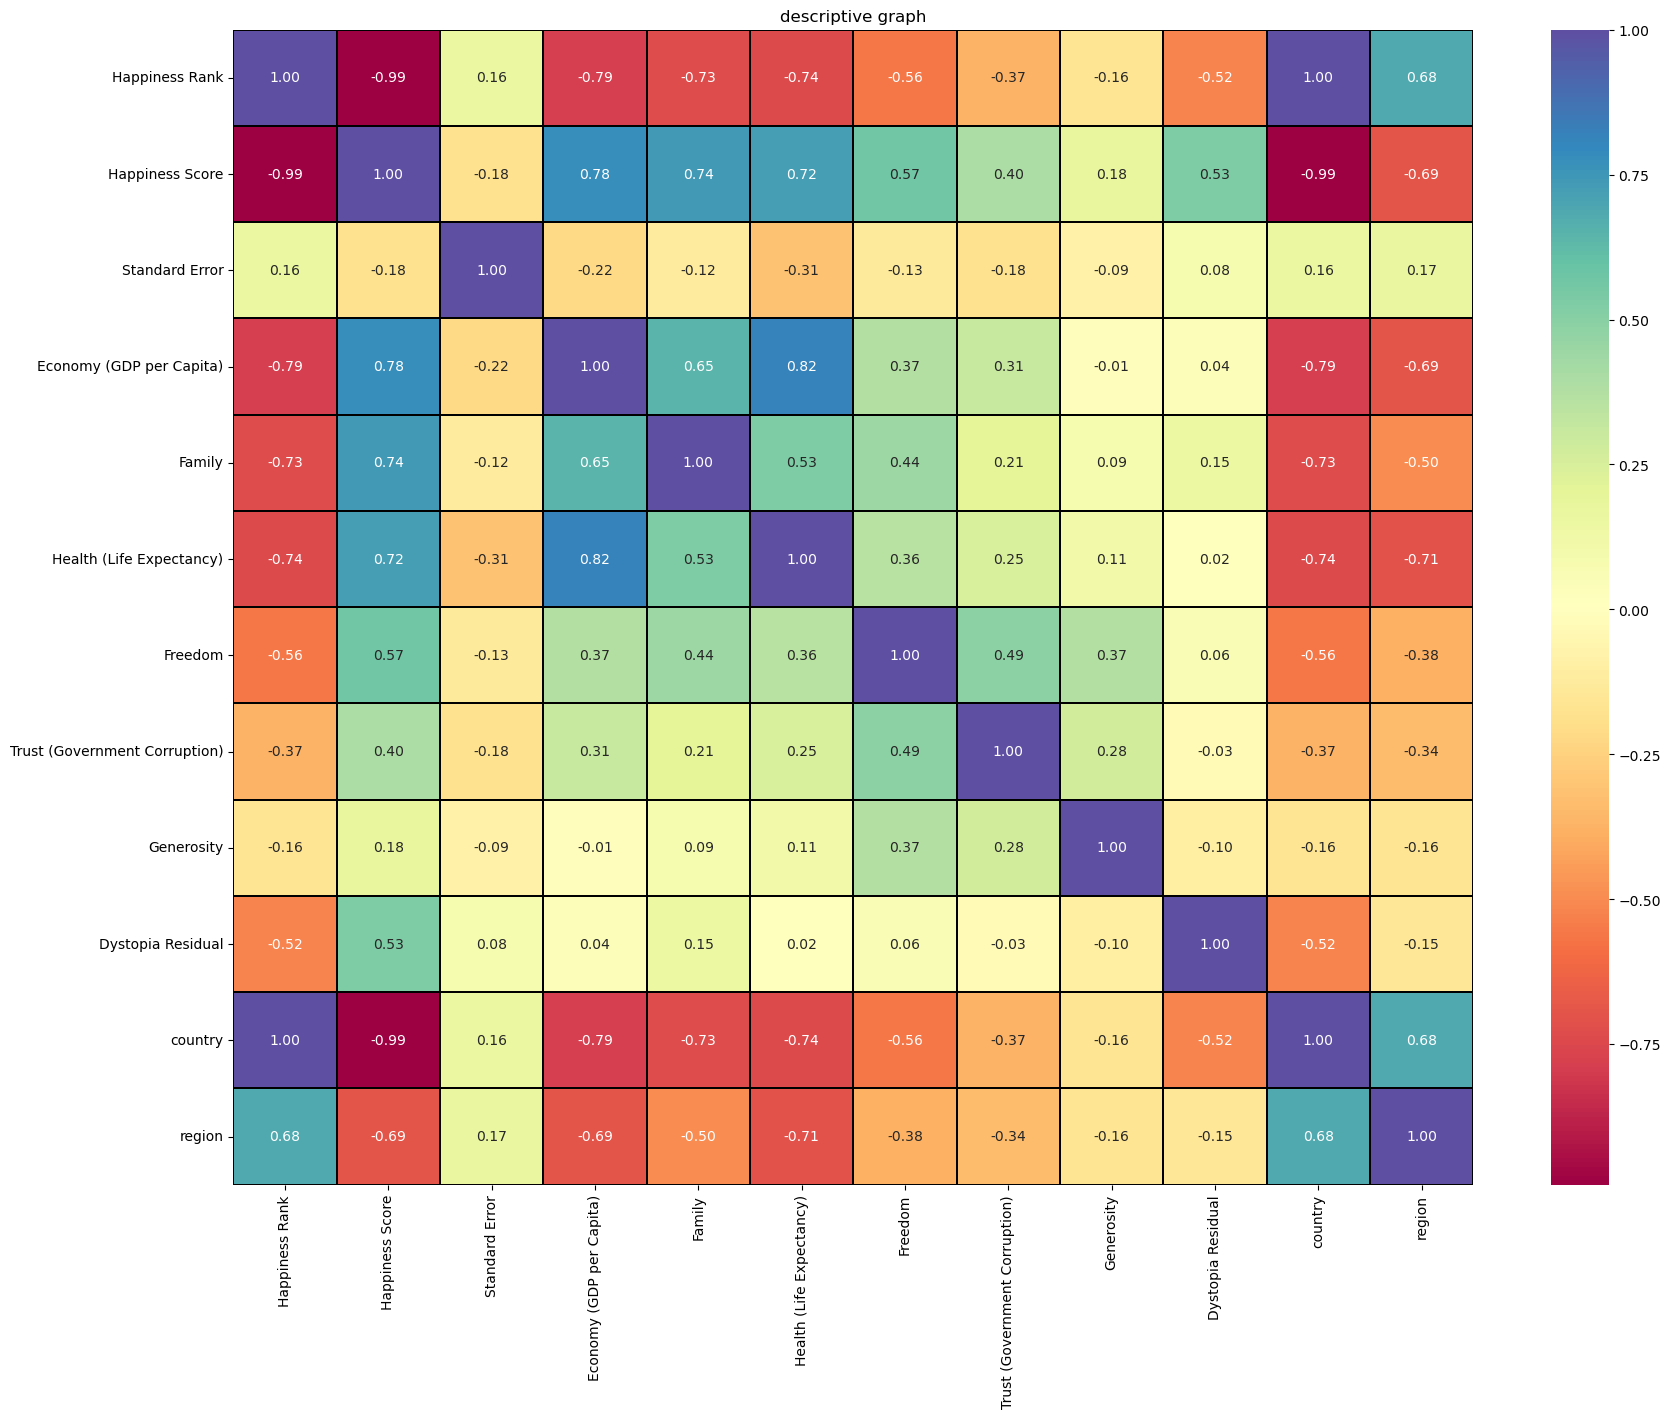

In [147]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='Black',cmap='Spectral')
plt.title('descriptive graph')
plt.show()

Relationship of target variable with all features-

1. Happiness score has 99% negetive relationship with Happiness_rank.
2. Happiness score has 18% negetive relationship with Standard_error.
3. Happiness score has 78% positive relationship with Economy(GDP Per capita).
4. Happiness score has 74% positive relationship with family.
5. Happiness score has 72% positive relationship with Health.
6.Happiness score has 57% positive relationship with freedom.
7.Happiness score has 40% positive relationship with Trust.
8.Happiness score has 18% positive relationship with Generosity.
9.Happiness score has 53% positive relationship with Dystopia residual.
10.country has 99% negetive relationship with happiness score.
11.region has 79% negetive relationship with hapiness score.

In [148]:
df.corr()["Happiness Score"]

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
country                         -0.992119
region                          -0.691704
Name: Happiness Score, dtype: float64

In [149]:
#Multivariate analysis-

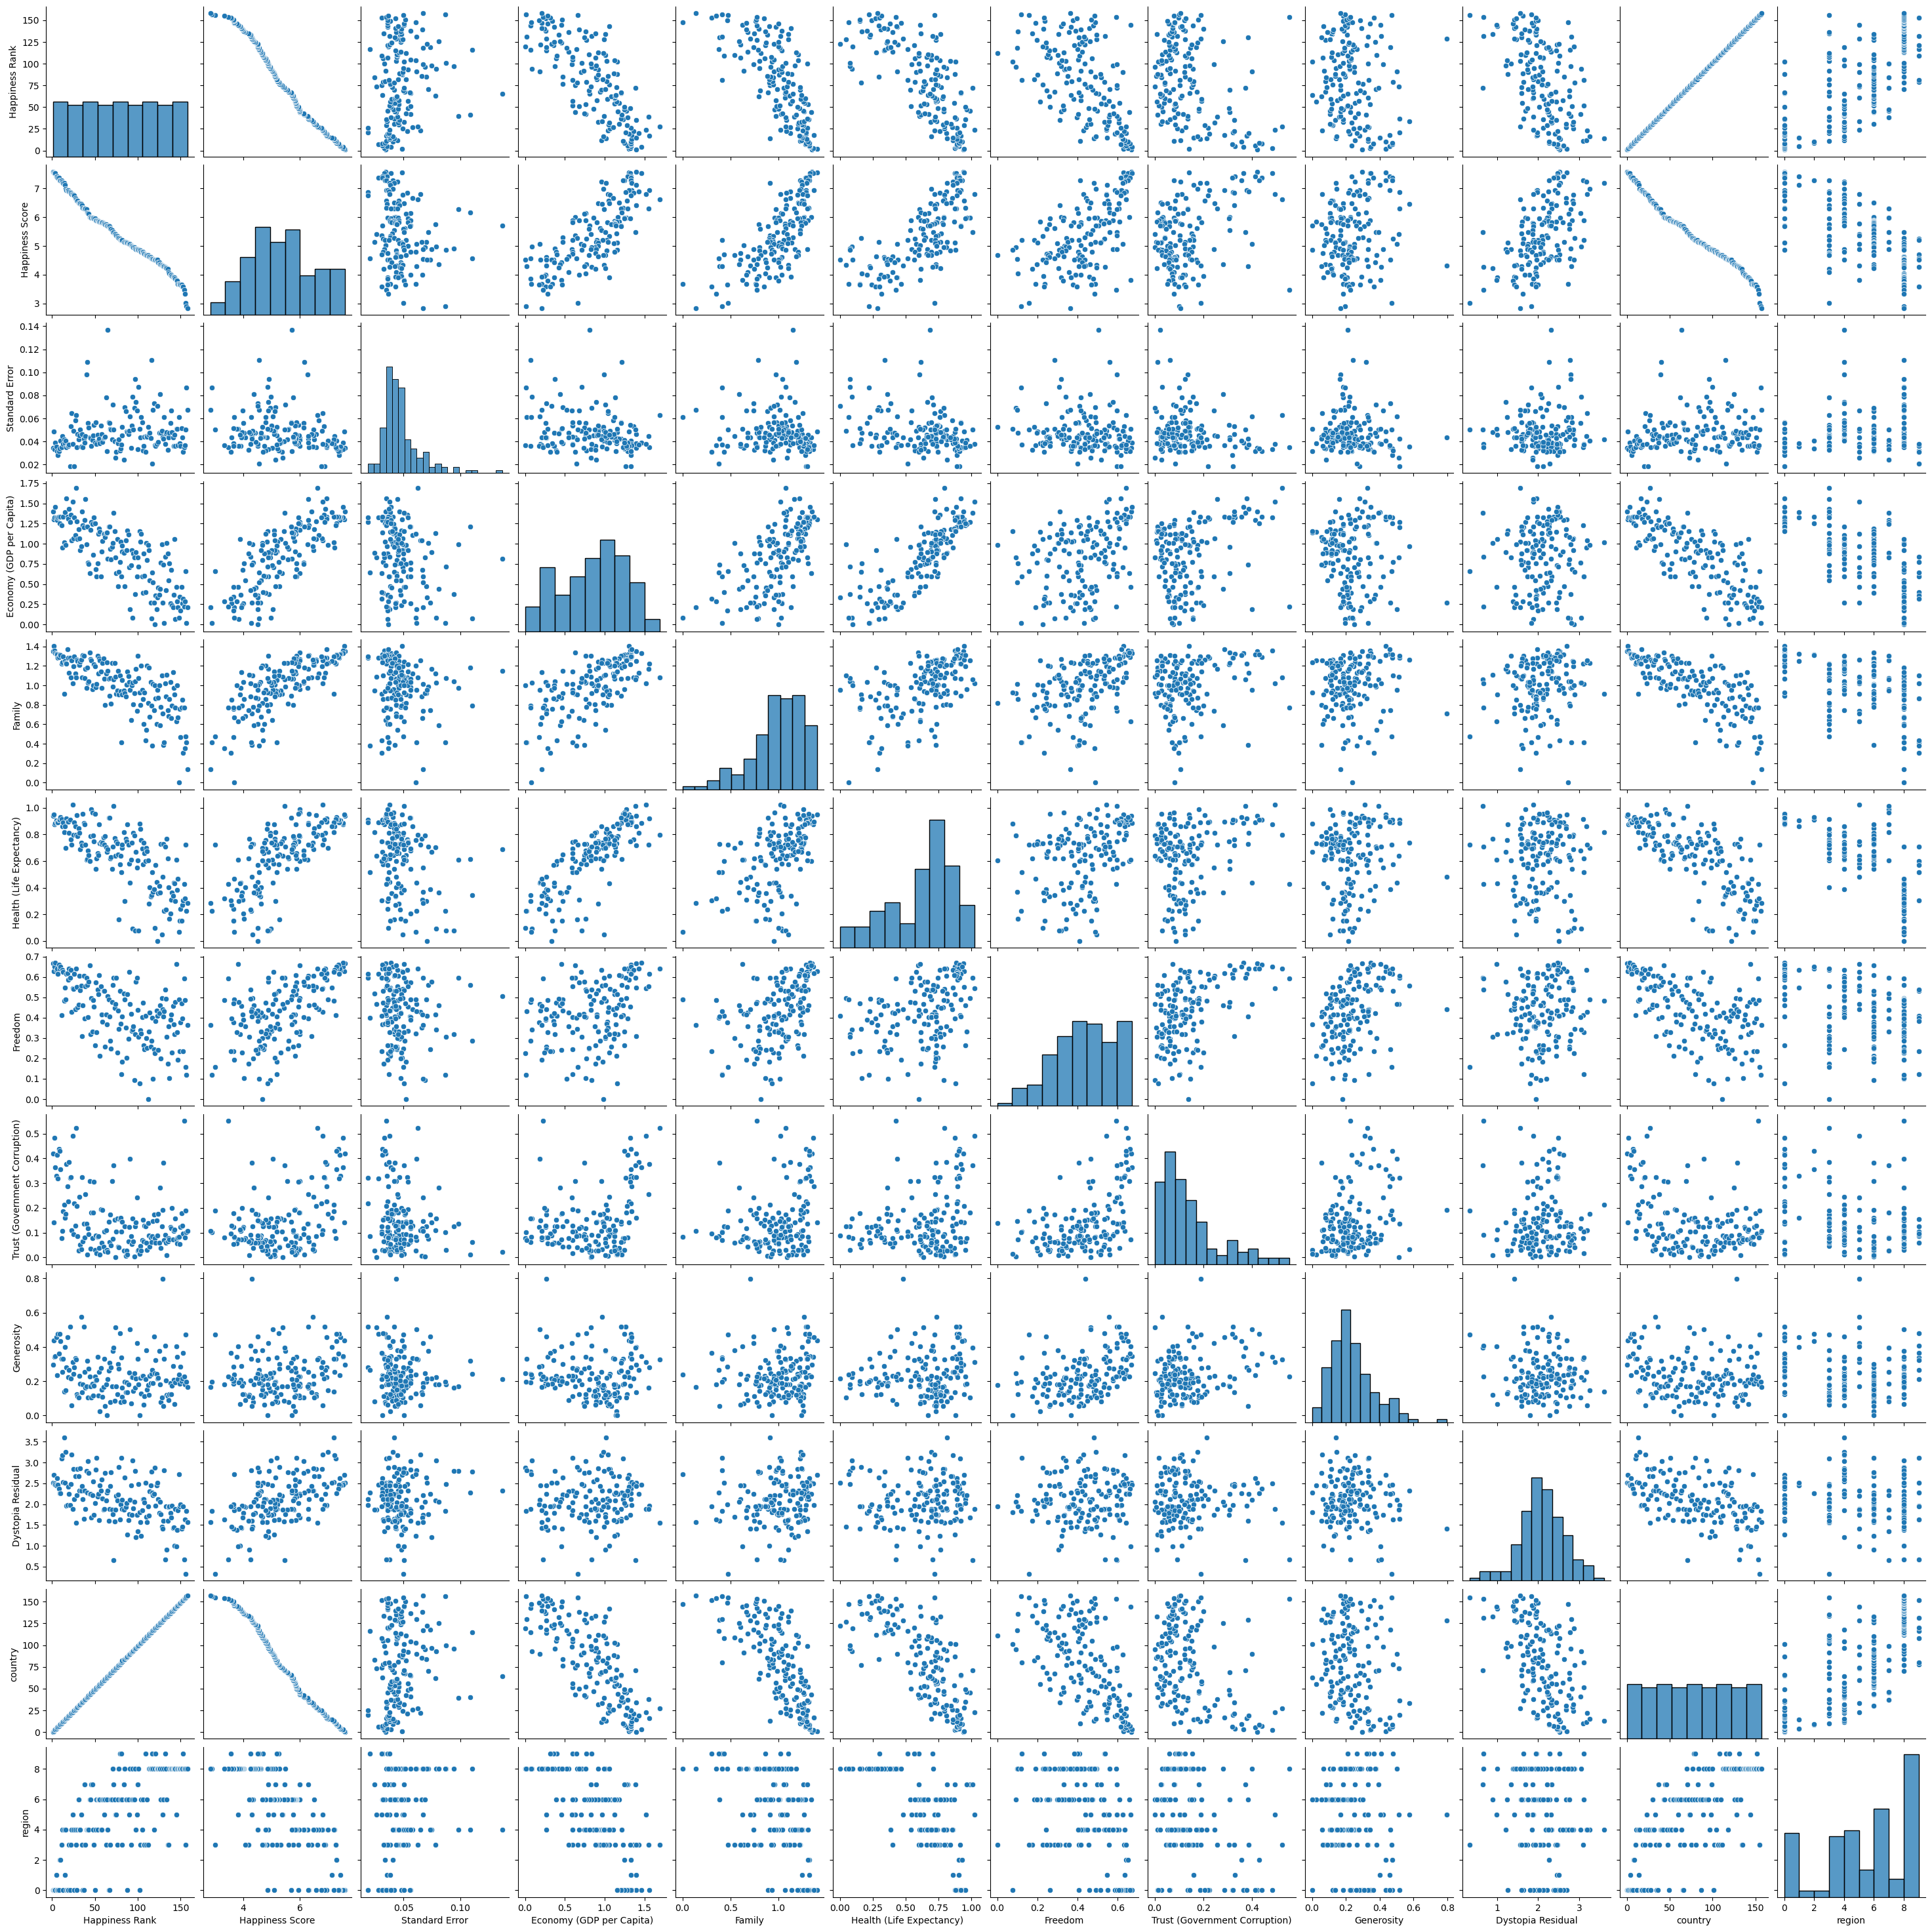

In [150]:
sns.pairplot(df)

Observations-

1.dystopia residual and country_0 has good negetive relationship.
2.dystopia residual and happiness rank has ggod negetive relationship.
3.generosity and freedom has positive relationship with each other.
4.trust and freedom has positive relationship.
5.freedom and happiness rank have good negetive relationship.
6.freedom and family has good positive relationship.
7.economy and country_0 has good negetive trelationship.
8.economy and Region_0 has good negetive trelationship.
9.economy & happiness rank has high negetive relationship.
10.economy & happiness score has high positive relationship.
11.economy & family has high positive relationship.
12.Economy and health has more than 80% correlation which means there will be multicollinearity among these features.

In [151]:
#Distribution of data-

In [152]:
x=df.drop(columns=['Happiness Score'])
y=df['Happiness Score']

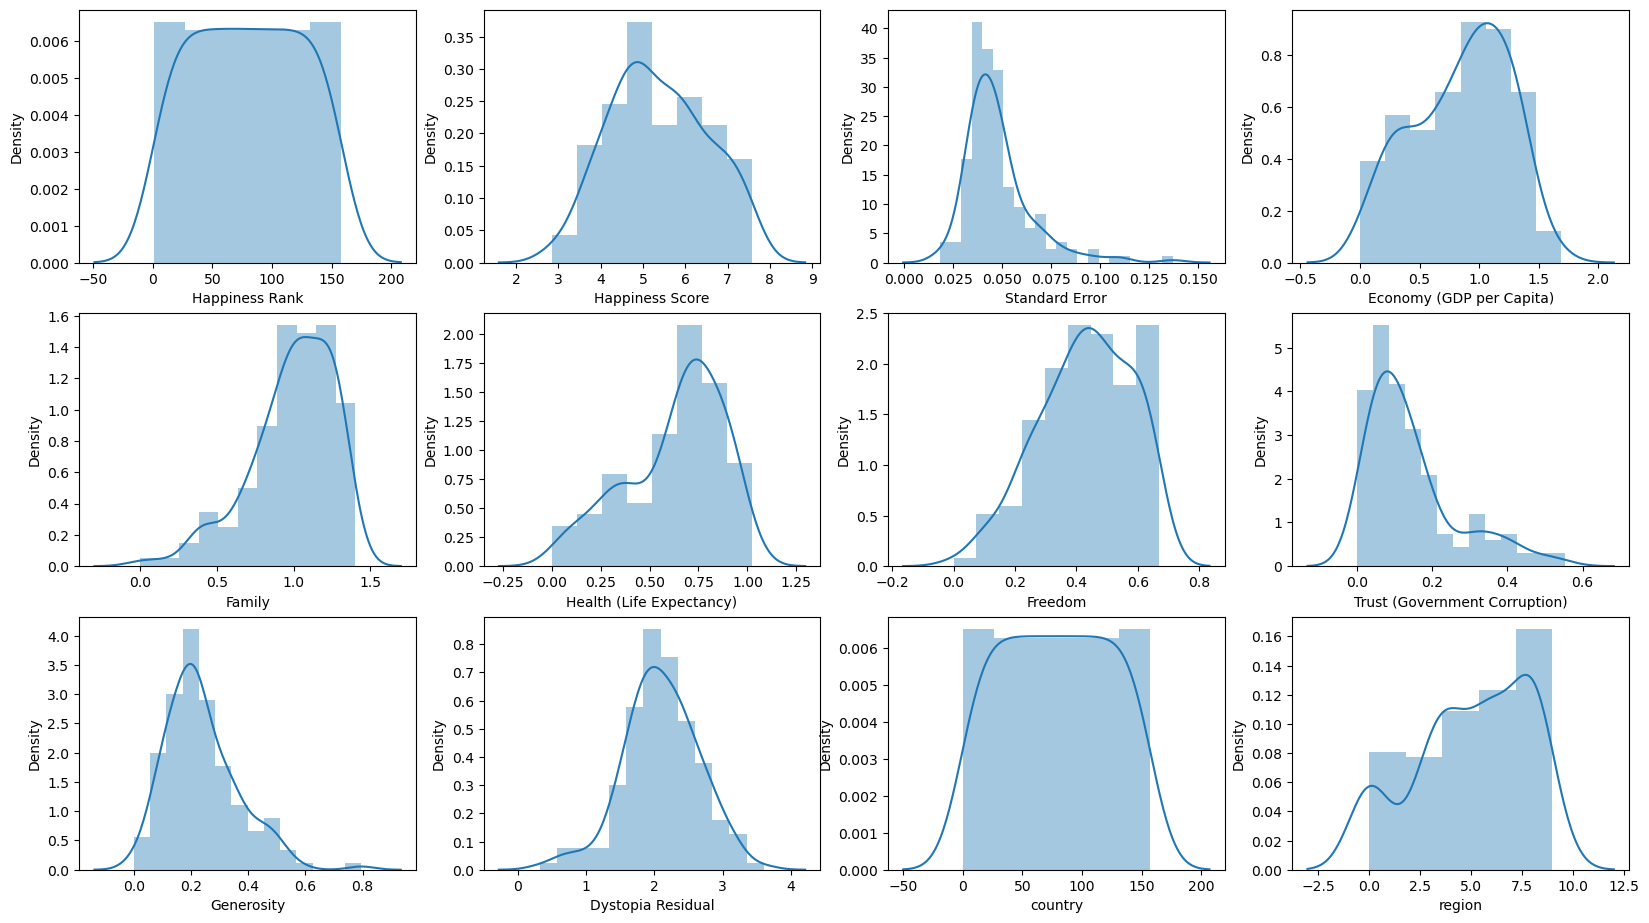

In [153]:
plt.figure(figsize=(20,23))
plotnumber=1

for column in df.columns:
    if plotnumber<=22:
        
        x=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
    
plt.show() 

In [298]:
#Separating the features-

In [299]:
features=['country','region','Standard Error','Happiness Rank','Economy (GDP per Capita)','Freedom','Dystopia Residual','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']

In [155]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
country                          0.000000
region                          -0.477295
dtype: float64

Skewness is high in standard_error,family,health,trust,generosity column

In [156]:
#Applying power transformation to remove skewness from the data-

In [157]:
from sklearn.preprocessing import PowerTransformer

In [158]:
pt=PowerTransformer(method='yeo-johnson') 

df[features]=pt.fit_transform(df[features].values)

In [159]:
df1=df[features]
df1

,country,region,Standard Error,Happiness Rank,Economy (GDP per Capita),Freedom,Dystopia Residual,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-2.099578,-1.765522,-0.972226,-2.063414,1.446061,1.756335,0.750992,1.669206,1.491765,1.773991,0.622391
1,-2.035043,-1.765522,0.309350,-2.008498,1.173321,1.439946,1.110011,2.012132,1.532348,0.315993,1.480995
2,-1.979513,-1.765522,-1.062017,-1.958574,1.239836,1.615733,0.702275,1.739586,1.085223,1.906792,0.927973
3,-1.929126,-1.765522,-0.503610,-1.912062,1.630246,1.792821,0.651035,1.553118,1.147600,1.624007,0.964080
4,-1.882248,-1.458401,-0.823548,-1.868100,1.242168,1.475479,0.625118,1.501726,1.270179,1.503484,1.592224
...,...,...,...,...,...,...,...,...,...,...,...
153,1.484304,1.095066,-0.916014,1.490877,-1.494046,1.135229,-2.393259,-0.959885,-0.939459,2.012856,0.065304
154,1.501390,1.095066,-0.719479,1.508130,-1.360829,0.307514,-0.863565,-1.896644,-1.276496,-0.433835,-0.334169
155,1.518444,-0.782644,0.399137,1.525352,-0.513469,-1.668658,-2.866216,-1.690664,0.262933,0.738915,1.659336
156,1.535467,1.095066,1.926902,1.542544,-1.894954,-1.849903,-0.514801,-1.796803,-1.525700,-0.151946,-0.194829


In [160]:
df1

,country,region,Standard Error,Happiness Rank,Economy (GDP per Capita),Freedom,Dystopia Residual,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-2.099578,-1.765522,-0.972226,-2.063414,1.446061,1.756335,0.750992,1.669206,1.491765,1.773991,0.622391
1,-2.035043,-1.765522,0.309350,-2.008498,1.173321,1.439946,1.110011,2.012132,1.532348,0.315993,1.480995
2,-1.979513,-1.765522,-1.062017,-1.958574,1.239836,1.615733,0.702275,1.739586,1.085223,1.906792,0.927973
3,-1.929126,-1.765522,-0.503610,-1.912062,1.630246,1.792821,0.651035,1.553118,1.147600,1.624007,0.964080
4,-1.882248,-1.458401,-0.823548,-1.868100,1.242168,1.475479,0.625118,1.501726,1.270179,1.503484,1.592224
...,...,...,...,...,...,...,...,...,...,...,...
153,1.484304,1.095066,-0.916014,1.490877,-1.494046,1.135229,-2.393259,-0.959885,-0.939459,2.012856,0.065304
154,1.501390,1.095066,-0.719479,1.508130,-1.360829,0.307514,-0.863565,-1.896644,-1.276496,-0.433835,-0.334169
155,1.518444,-0.782644,0.399137,1.525352,-0.513469,-1.668658,-2.866216,-1.690664,0.262933,0.738915,1.659336
156,1.535467,1.095066,1.926902,1.542544,-1.894954,-1.849903,-0.514801,-1.796803,-1.525700,-0.151946,-0.194829


In [161]:
df1['Happiness score']=df['Happiness Score']

In [162]:
df1

,country,region,Standard Error,Happiness Rank,Economy (GDP per Capita),Freedom,Dystopia Residual,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Happiness score
0,-2.099578,-1.765522,-0.972226,-2.063414,1.446061,1.756335,0.750992,1.669206,1.491765,1.773991,0.622391,7.587
1,-2.035043,-1.765522,0.309350,-2.008498,1.173321,1.439946,1.110011,2.012132,1.532348,0.315993,1.480995,7.561
2,-1.979513,-1.765522,-1.062017,-1.958574,1.239836,1.615733,0.702275,1.739586,1.085223,1.906792,0.927973,7.527
3,-1.929126,-1.765522,-0.503610,-1.912062,1.630246,1.792821,0.651035,1.553118,1.147600,1.624007,0.964080,7.522
4,-1.882248,-1.458401,-0.823548,-1.868100,1.242168,1.475479,0.625118,1.501726,1.270179,1.503484,1.592224,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.484304,1.095066,-0.916014,1.490877,-1.494046,1.135229,-2.393259,-0.959885,-0.939459,2.012856,0.065304,3.465
154,1.501390,1.095066,-0.719479,1.508130,-1.360829,0.307514,-0.863565,-1.896644,-1.276496,-0.433835,-0.334169,3.340
155,1.518444,-0.782644,0.399137,1.525352,-0.513469,-1.668658,-2.866216,-1.690664,0.262933,0.738915,1.659336,3.006
156,1.535467,1.095066,1.926902,1.542544,-1.894954,-1.849903,-0.514801,-1.796803,-1.525700,-0.151946,-0.194829,2.905


In [300]:
#Separating x & y

In [163]:
x=df1.drop(columns=['Happiness score'])
y=df1['Happiness score']

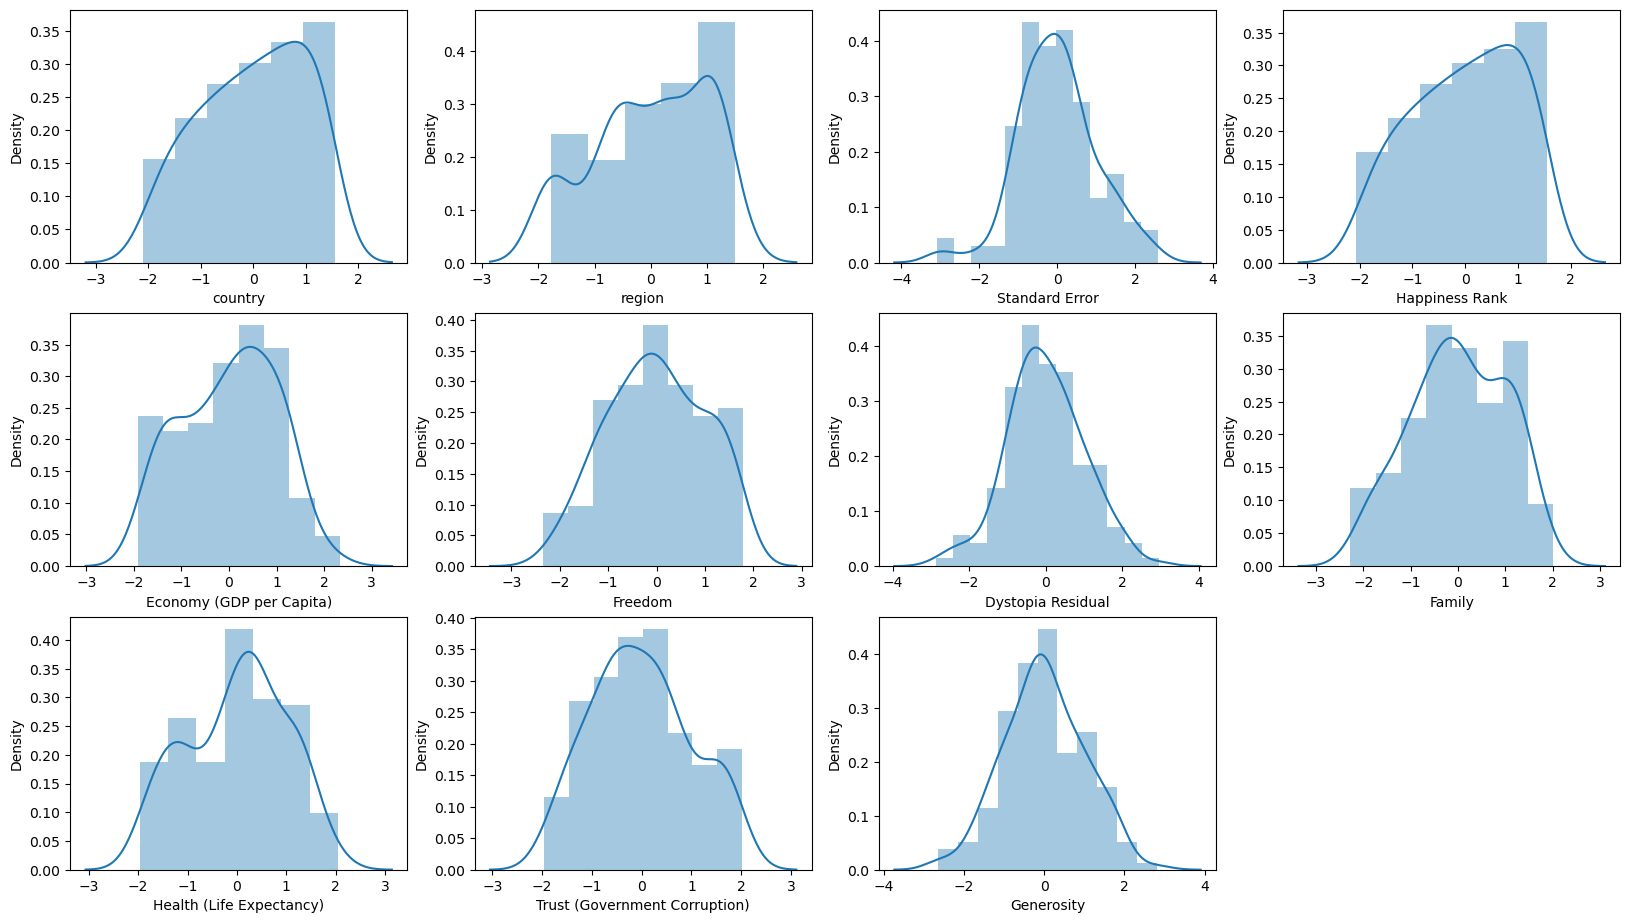

In [164]:
plt.figure(figsize=(20,23))
plotnumber=1

for column in df1[features]:
    if plotnumber<=22:
        
        x=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
    
plt.show() 

so now after applying power transformation method our data distribution looks normal.

In [301]:
#Checking outliers-

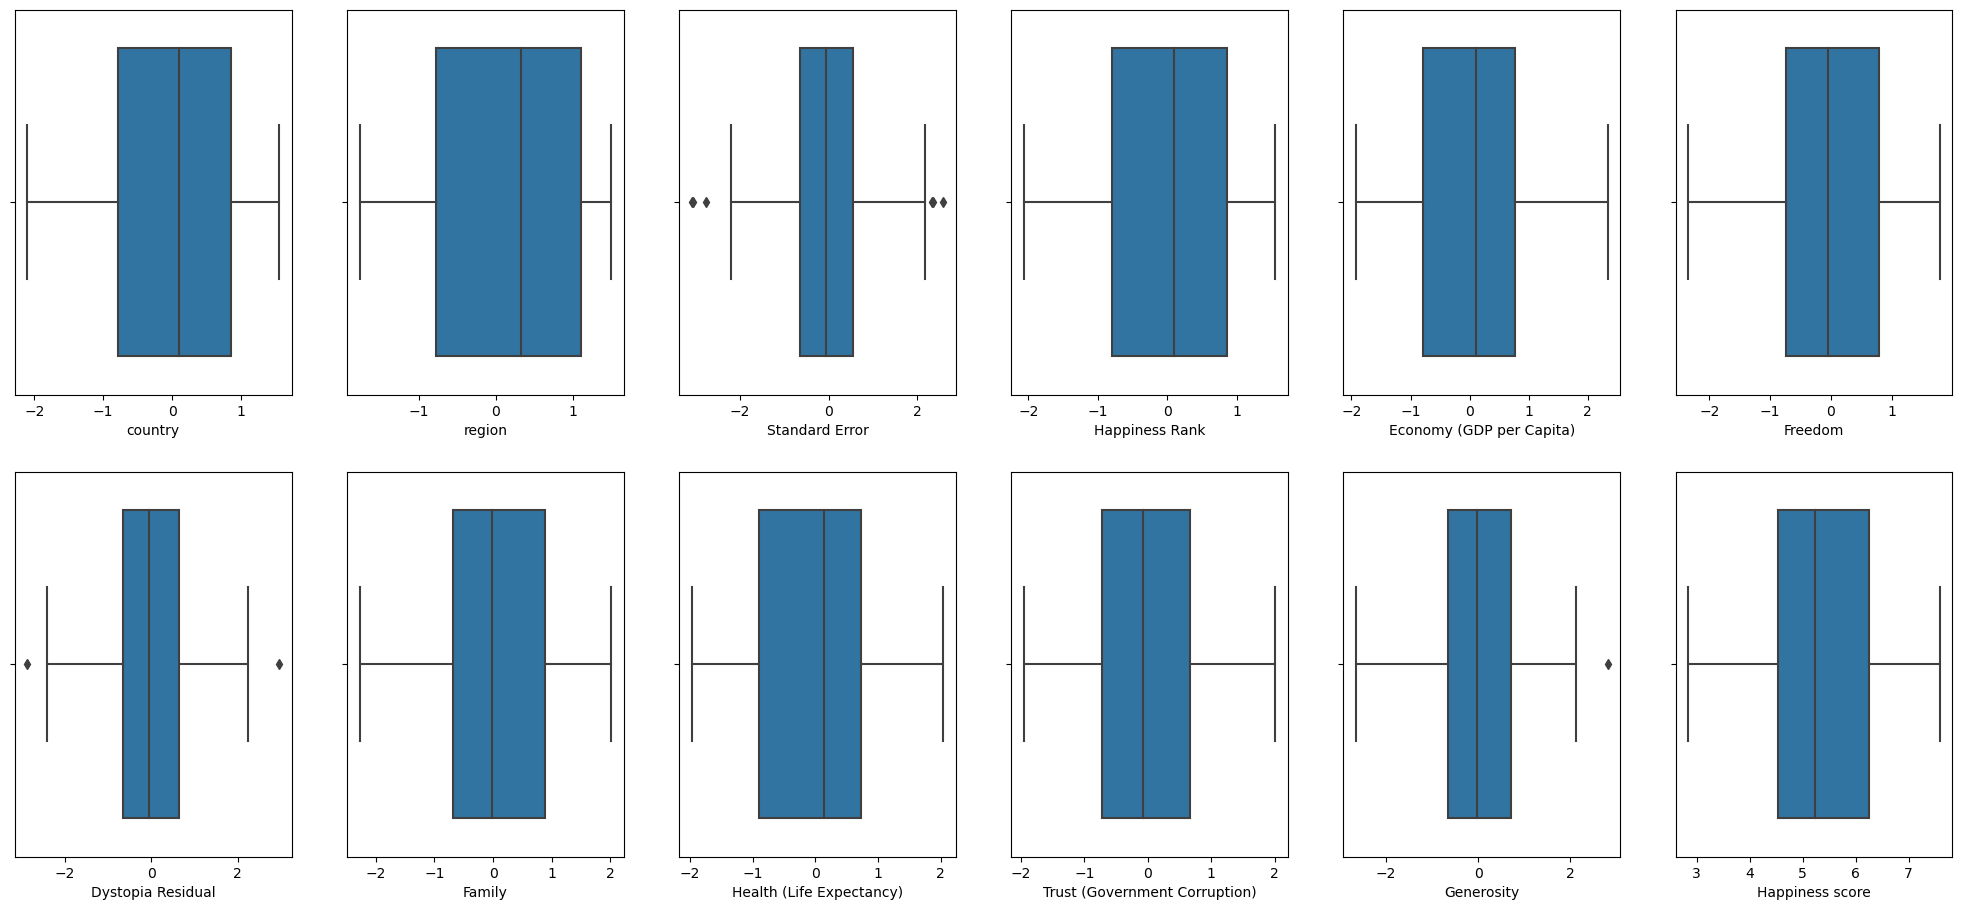

In [165]:
plt.figure(figsize=(25,23))
plotnumber=1

for i in df1.columns:
    if plotnumber<=22:
        plt.subplot(4,6,plotnumber)
        sns.boxplot(df1[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()   

standard error,generosity,dystopia residual has outliers which we need to remove.

In [166]:
df1.columns

Index(['country', 'region', 'Standard Error', 'Happiness Rank',
       'Economy (GDP per Capita)', 'Freedom', 'Dystopia Residual', 'Family',
       'Health (Life Expectancy)', 'Trust (Government Corruption)',
       'Generosity', 'Happiness score'],
      dtype='object')

In [303]:
#outliers removal by zscore method-

In [167]:
from scipy.stats import zscore
out_features=df1[['Standard Error','Generosity']]
z=np.abs(zscore(out_features))  
z

,Standard Error,Generosity
0,0.972226,0.622391
1,0.309350,1.480995
2,1.062017,0.927973
3,0.503610,0.964080
4,0.823548,1.592224
...,...,...
153,0.916014,0.065304
154,0.719479,0.334169
155,0.399137,1.659336
156,1.926902,0.194829


In [168]:
#threshold=2.5
np.where(z>2.5)

(array([ 20,  25,  63,  64, 101, 116, 128], dtype=int64),
 array([0, 0, 1, 0, 1, 0, 1], dtype=int64))

In [169]:
df2=df1[(z<2.5).all(axis=1)] 
df2.shape

(151, 12)

In [170]:
print('old data frame size:- ',df1.shape[0])
print('new data frame size:-',df2.shape[0])

old data frame size:-  158
new data frame size:- 151


In [171]:
print('data loss:-',((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

data loss:- 4.430379746835443


In [172]:
df2

,country,region,Standard Error,Happiness Rank,Economy (GDP per Capita),Freedom,Dystopia Residual,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Happiness score
0,-2.099578,-1.765522,-0.972226,-2.063414,1.446061,1.756335,0.750992,1.669206,1.491765,1.773991,0.622391,7.587
1,-2.035043,-1.765522,0.309350,-2.008498,1.173321,1.439946,1.110011,2.012132,1.532348,0.315993,1.480995,7.561
2,-1.979513,-1.765522,-1.062017,-1.958574,1.239836,1.615733,0.702275,1.739586,1.085223,1.906792,0.927973,7.527
3,-1.929126,-1.765522,-0.503610,-1.912062,1.630246,1.792821,0.651035,1.553118,1.147600,1.624007,0.964080,7.522
4,-1.882248,-1.458401,-0.823548,-1.868100,1.242168,1.475479,0.625118,1.501726,1.270179,1.503484,1.592224,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.484304,1.095066,-0.916014,1.490877,-1.494046,1.135229,-2.393259,-0.959885,-0.939459,2.012856,0.065304,3.465
154,1.501390,1.095066,-0.719479,1.508130,-1.360829,0.307514,-0.863565,-1.896644,-1.276496,-0.433835,-0.334169,3.340
155,1.518444,-0.782644,0.399137,1.525352,-0.513469,-1.668658,-2.866216,-1.690664,0.262933,0.738915,1.659336,3.006
156,1.535467,1.095066,1.926902,1.542544,-1.894954,-1.849903,-0.514801,-1.796803,-1.525700,-0.151946,-0.194829,2.905


Now the ouliers are almost removed from the dataset.

In [304]:
#separating x & y from new data frame-

In [173]:
x=df2.drop('Happiness score',axis=1)
y=df2['Happiness score']

In [174]:
x

,country,region,Standard Error,Happiness Rank,Economy (GDP per Capita),Freedom,Dystopia Residual,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-2.099578,-1.765522,-0.972226,-2.063414,1.446061,1.756335,0.750992,1.669206,1.491765,1.773991,0.622391
1,-2.035043,-1.765522,0.309350,-2.008498,1.173321,1.439946,1.110011,2.012132,1.532348,0.315993,1.480995
2,-1.979513,-1.765522,-1.062017,-1.958574,1.239836,1.615733,0.702275,1.739586,1.085223,1.906792,0.927973
3,-1.929126,-1.765522,-0.503610,-1.912062,1.630246,1.792821,0.651035,1.553118,1.147600,1.624007,0.964080
4,-1.882248,-1.458401,-0.823548,-1.868100,1.242168,1.475479,0.625118,1.501726,1.270179,1.503484,1.592224
...,...,...,...,...,...,...,...,...,...,...,...
153,1.484304,1.095066,-0.916014,1.490877,-1.494046,1.135229,-2.393259,-0.959885,-0.939459,2.012856,0.065304
154,1.501390,1.095066,-0.719479,1.508130,-1.360829,0.307514,-0.863565,-1.896644,-1.276496,-0.433835,-0.334169
155,1.518444,-0.782644,0.399137,1.525352,-0.513469,-1.668658,-2.866216,-1.690664,0.262933,0.738915,1.659336
156,1.535467,1.095066,1.926902,1.542544,-1.894954,-1.849903,-0.514801,-1.796803,-1.525700,-0.151946,-0.194829


In [175]:
#As we have seen earlier there was an issue of multicollinearity so we will calculate VIF for each column-

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif 

,VIF VALUES,features
0,33191.710471,country
1,2.667935,region
2,1.229999,Standard Error
3,32854.428966,Happiness Rank
4,14.350870,Economy (GDP per Capita)
5,3.453823,Freedom
6,18.967478,Dystopia Residual
7,6.496725,Family
8,8.970510,Health (Life Expectancy)
9,2.156568,Trust (Government Corruption)


As we can see that there is very high multi collinearity among features so we cant drop many columns as they are highly correlated
so we will apply PCA method.

In [177]:
# Applying PCA-

In [178]:
from sklearn.decomposition import PCA

In [179]:
pca=PCA()
pca.fit_transform(x)

array([[ 5.09530722e+00,  5.27013649e-01, -6.63192232e-01, ...,
        -5.10873933e-02,  4.37892815e-02,  2.27425188e-02],
       [ 4.71246278e+00, -2.37995890e-01, -8.11759354e-01, ...,
        -2.51757029e-01, -7.81780299e-02,  1.75997106e-02],
       [ 4.81939820e+00,  7.21404894e-01, -9.40443435e-01, ...,
         8.93933143e-02,  8.29340357e-02,  1.09497436e-02],
       ...,
       [-2.26693637e+00,  2.86521726e+00,  1.22404368e+00, ...,
        -2.17700292e-01,  3.02352503e-01,  2.77761763e-03],
       [-4.35397029e+00, -2.60948491e-01, -5.42658720e-01, ...,
        -3.57767427e-01,  4.14833738e-01,  7.14308630e-03],
       [-3.92109429e+00,  5.71314069e-01, -3.72043674e-01, ...,
        -5.50915982e-02,  3.66701468e-01,  6.63734011e-03]])

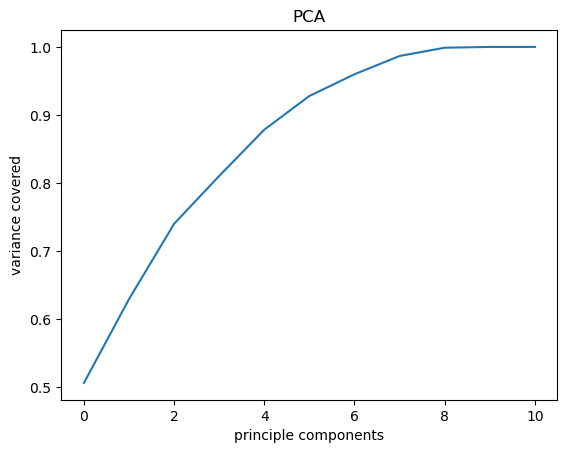

In [180]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum  #this explained ratio will tell the correlation bw feature 
plt.xlabel('principle components') #and label for every component of feature i.e igon values or the distance.
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

In [235]:
pca=PCA(n_components=7)
new_components=pca.fit_transform(x)

In [236]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.095307,0.527014,-0.663192,-0.297660,-0.646558,-0.031430,-0.054438
1,4.712463,-0.237996,-0.811759,0.820782,1.027755,0.217338,-0.085042
2,4.819398,0.721405,-0.940443,-0.168162,-0.703877,0.007269,-0.318443
3,4.814851,0.657660,-0.825724,-0.251719,-0.087556,0.063119,-0.059887
4,4.539137,0.850514,-0.984050,0.393110,-0.278622,0.350815,-0.405716
...,...,...,...,...,...,...,...
146,-2.333441,3.487668,-0.558605,-0.998803,-1.287935,-0.764406,0.333601
147,-3.265435,1.042255,-0.113315,0.190850,-1.022699,-0.131138,1.188376
148,-2.266936,2.865217,1.224044,-0.343844,0.746957,2.533018,-0.799643
149,-4.353970,-0.260948,-0.542659,-0.848033,0.987680,0.829257,-0.423644


In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [238]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.9934254810397493 at random state 30


In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [240]:
#Linear regression-

In [241]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw 
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.9959740844749532
r2_score on train data - 0.9925867843528754
mean absolute error-  0.06173736846108254
mean squared error-  0.0060390041431430674
root mean squared error-  0.0777110297393045


for linear regression train & test accuracy is 99%.

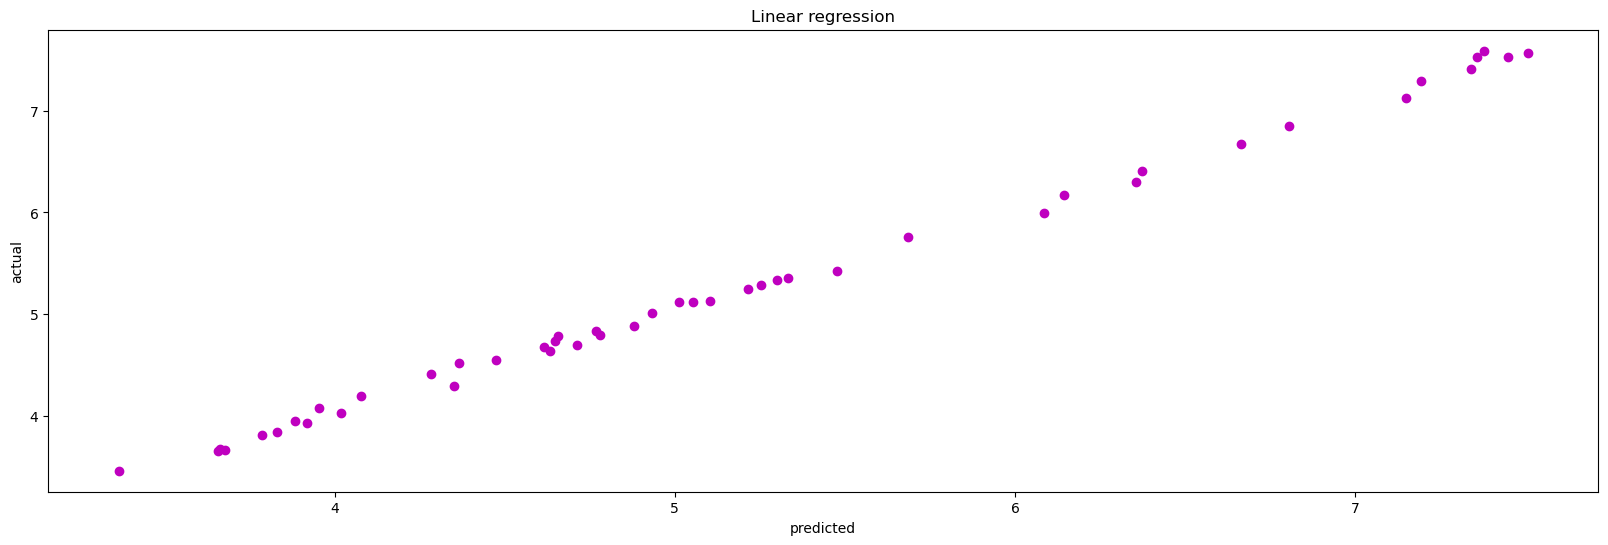

In [242]:
plt.figure(figsize=(20,6))
plt.scatter(x=predlr,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [305]:
#Random forest-

In [245]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train)) 
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.9967899737257647
r2_score on train data - 0.9993017216617668
mean absolute error-  0.04560739130434799
mean squared error-  0.004815143747825961
root mean squared error-  0.06939123682300209


for random forest train accuracy is 99.9% and test accuracy is 99.6 

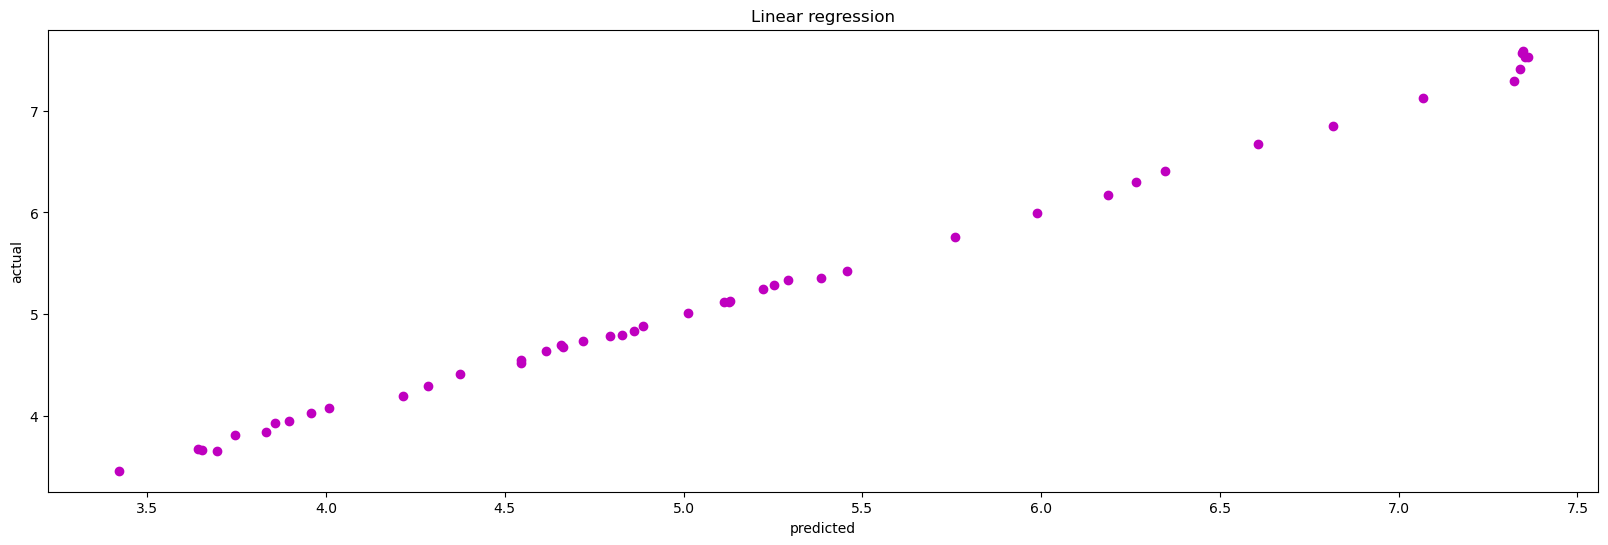

In [279]:
plt.figure(figsize=(20,6))
plt.scatter(x=predrf,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [246]:
#KNN-

In [247]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.9483372910668343
r2_score on train data - 0.9391613306811382
mean absolute error-  0.22753913043478272
mean squared error-  0.07749574260869574
root mean squared error-  0.27838057153597434


for knn train accuracy is 93.9% and test accuracy is 94.8%

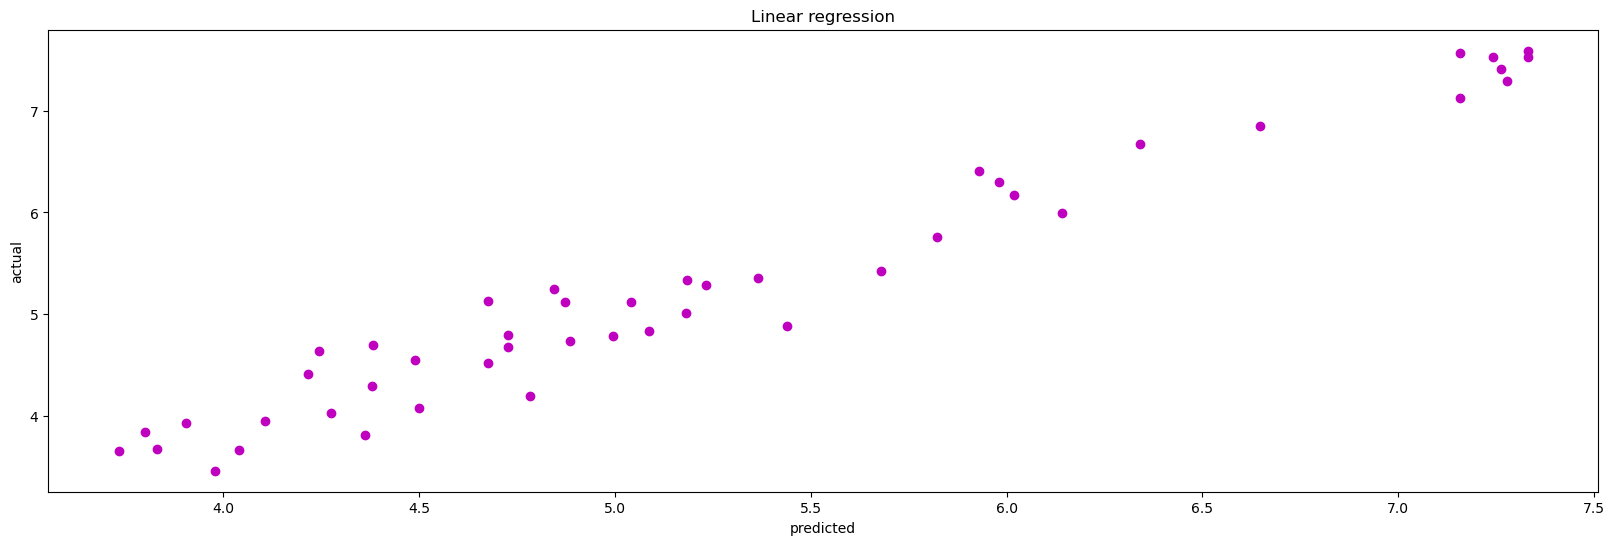

In [281]:
plt.figure(figsize=(20,6))
plt.scatter(x=predkn,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [248]:
#Gradient boosting regressor-

In [249]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.9977257139637339
r2_score on train data - 0.9999976896497869
mean absolute error-  0.04232094967595018
mean squared error-  0.0034115029762189727
root mean squared error-  0.05840807286855964


for GradientBoostingRegressor train accuracy is 99.9% and test accuracy is 99.8%

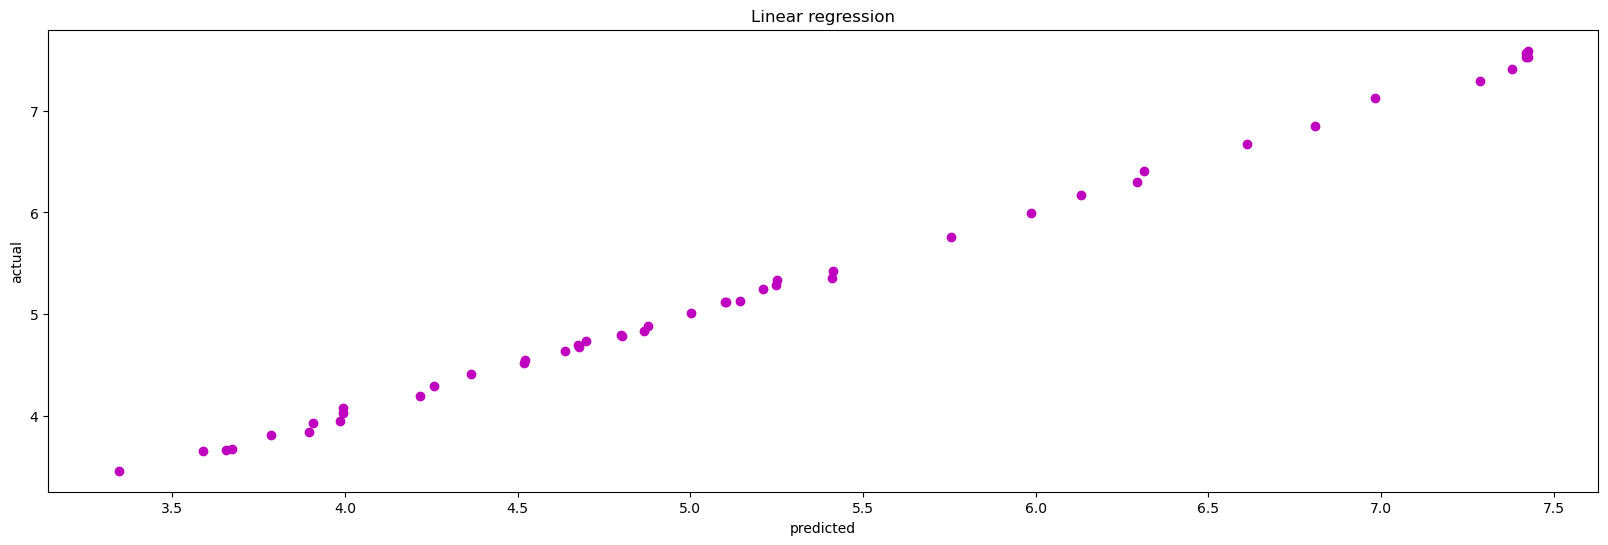

In [282]:
plt.figure(figsize=(20,6))
plt.scatter(x=predgb,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [250]:
#Lasso-

In [251]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.08663476737288844
r2_score on train data - 0.1002218530254686
mean absolute error-  0.9976481076935164
mean squared error-  1.3700775363322573
root mean squared error-  1.170503112482943


In [ ]:
for lasso train accuracy is 100% and test accuracy is 8%

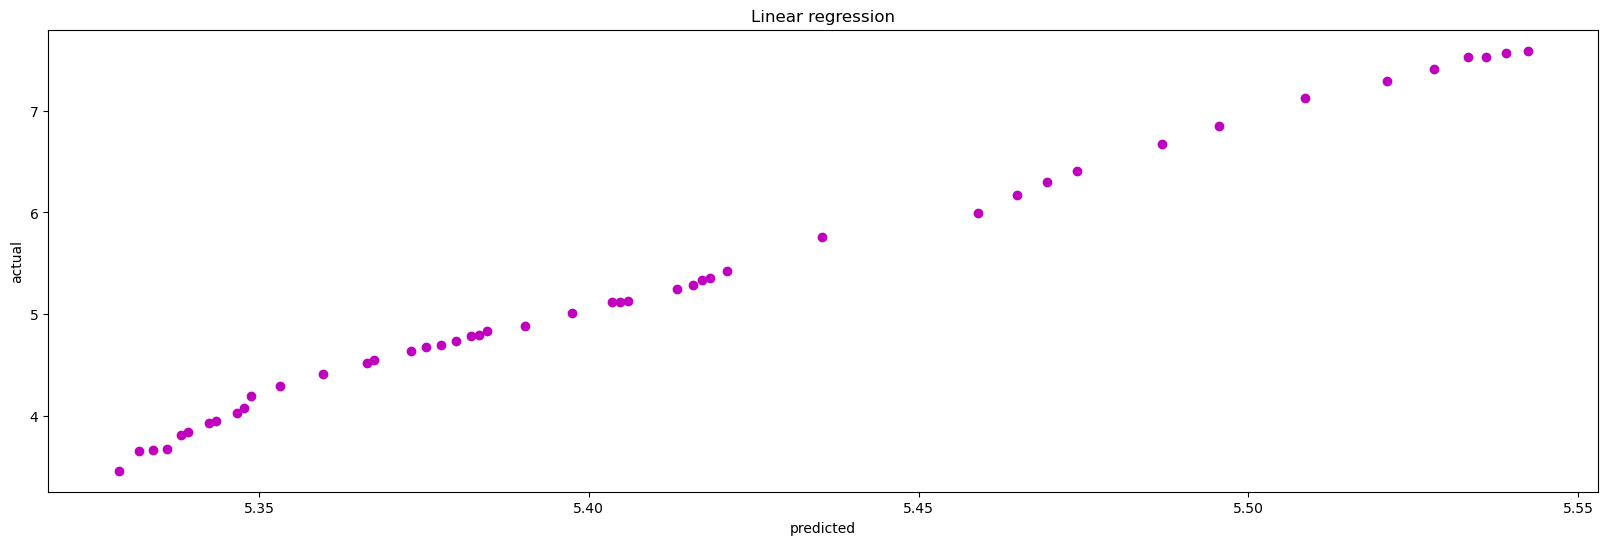

In [283]:
plt.figure(figsize=(20,6))
plt.scatter(x=predla,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

In [266]:
#Ridge

In [252]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.9966927606515914
r2_score on train data - 0.9914429016697393
mean absolute error-  0.05647952795477064
mean squared error-  0.004960966518832568
root mean squared error-  0.07043412893500259


for ridge the train accuracy is 99% and test accuracy is 99.6%.

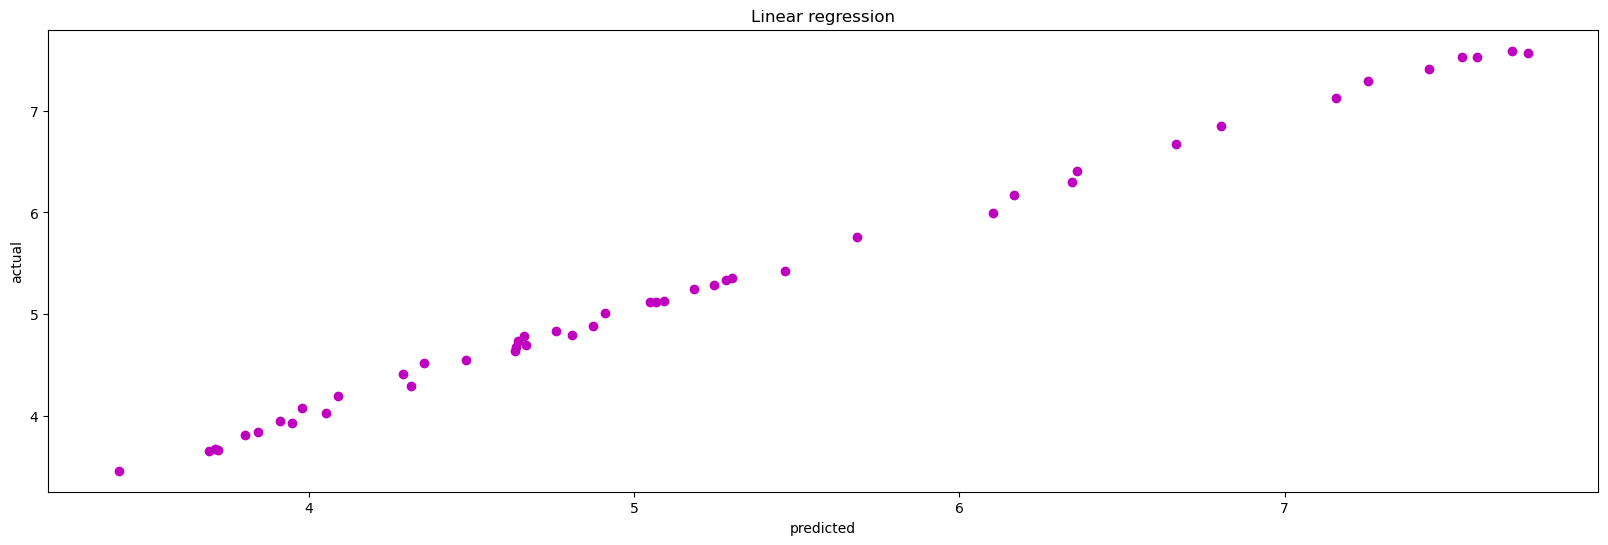

In [284]:
plt.figure(figsize=(20,6))
plt.scatter(x=predri,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [267]:
#Decision tree-

In [253]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.9893686651516437
r2_score on train data - 1.0
mean absolute error-  0.0760869565217391
mean squared error-  0.01594734782608695
root mean squared error-  0.12628280890955407


for decision tree train accuracy is 100% and test accuracy is 99%

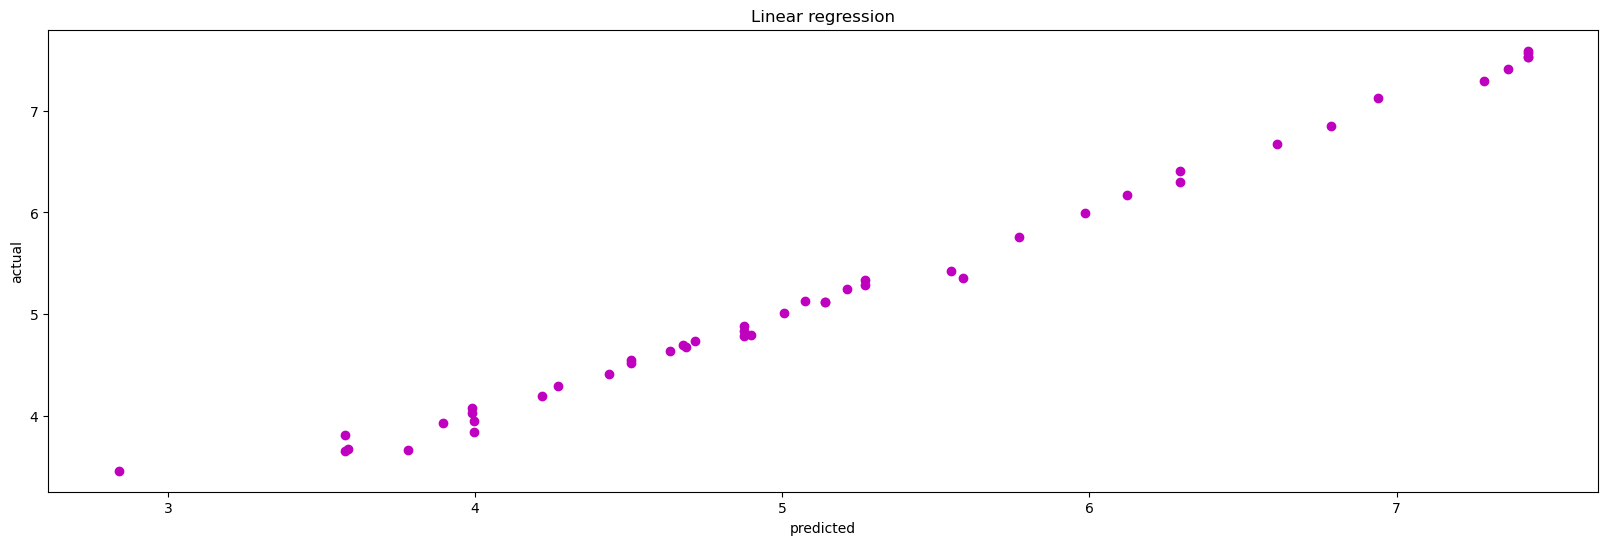

In [285]:
plt.figure(figsize=(20,6))
plt.scatter(x=preddt,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

a very close relationship can be seen in predicted and actual values.

In [268]:
#ExtraTreesRegressor

In [269]:
from sklearn.ensemble import ExtraTreesRegressor

In [255]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.998145378110753
r2_score on train data - 1.0
mean absolute error-  0.030401521739129654
mean squared error-  0.0027819931152171795
root mean squared error-  0.05274460271171999


for extra tree regressor train accuracy is 100% and test accuracy is 99%

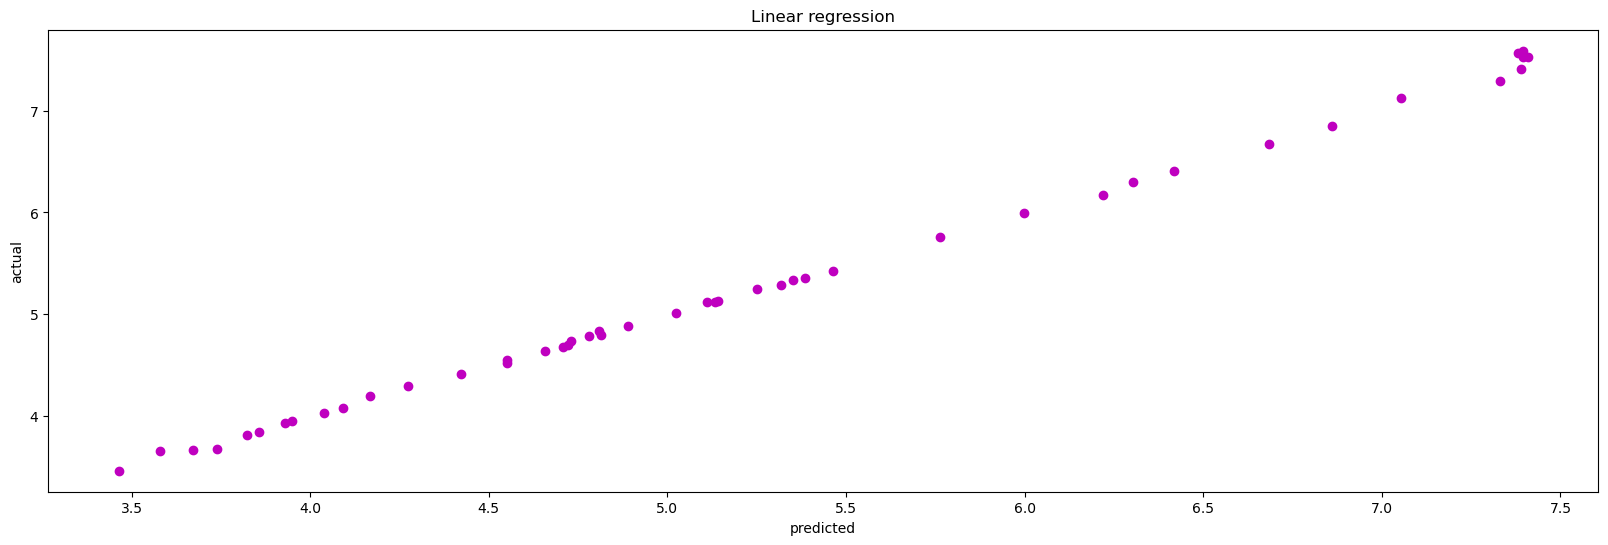

In [286]:
plt.figure(figsize=(20,6))
plt.scatter(x=predet,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

In [287]:
#Cross validation score-

In [288]:
from sklearn.model_selection import cross_val_score

In [289]:
#Linear regression-

In [258]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predlr)-score.mean())*100)

[0.84697227 0.80662609 0.83300269 0.54392894 0.51407328]
0.7089206535240647
difference bw r2_score and cross validation score is  28.705343095088843


In [271]:
#Random forest-

In [272]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[-3.57644545 -1.09402599 -0.59664962 -0.79914898 -2.40465598]
-1.6941852042587524
difference bw r2_score and cross validation score is  269.09751779845175


In [273]:
#KNN-

In [260]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[-6.81082122 -2.02075129 -1.67099552 -6.57093231 -4.12720733]
-4.240141531517288
difference bw r2_score and cross validation score is - 518.8478822584123


In [274]:
#Gradientboostingregressor-

In [261]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[-2.92596552 -0.58667174 -0.47335717 -0.2081907  -1.96520958]
-1.2318789405042616
difference bw r2_score and cross validation score is - 222.96046544679956


In [275]:
#Lasso-

In [262]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[-36.66669348  -7.9902683    0.32736462 -15.02302006 -24.51333473]
-16.773190390316515
difference bw r2_score and cross validation score is-  1685.9825157689404


In [276]:
#Ridge-

In [263]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.9001205  0.85413013 0.83831162 0.52148209 0.53154261]
0.7291173899636048
difference bw r2_score and cross validation score is - 26.757537068798666


In [277]:
#Decision tree-

In [278]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[-2.88491063 -1.11190473 -0.95308552 -0.61431605 -2.03207342]
-1.5192580693557773
difference bw r2_score and cross validation score is - 250.8626734507421


In [ ]:
#Extratreeregressor-

In [265]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[-3.33464536  0.81133317  0.89953509  0.89889876 -2.08685724]
-0.5623471174161706
difference bw r2_score and cross validation score is - 156.04924955269234


i am selecting linear regression as my best model as it has 99.5% both train & test accuracy.

In [292]:
#Saving model-

In [293]:
import pickle

In [294]:
pickle.dump(lr,open('happiness score','wb'))

In [295]:
loaded_model=pickle.load(open('happiness score','rb'))
result=loaded_model.score(x_test,y_test)
result

0.9959740844749532

In [296]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
predicted,6.804137,7.340265,7.449678,4.646449,5.05214,5.104398,4.3498,3.36522,5.216434,4.632739,...,4.781486,3.78664,5.299391,4.019333,3.658574,3.95483,7.149538,5.476731,4.475477,5.684544
actual,6.853000,7.406000,7.522000,4.739000,5.12300,5.129000,4.2920,3.46500,5.253000,4.642000,...,4.800000,3.81900,5.332000,4.033000,3.655000,4.07700,7.119000,5.429000,4.550000,5.759000
